## T-SQL Learning --- for the development of sqlserver

### Basic 
#### Variabel and alias


In [ ]:
declare @catid int = 2; 
declare @numrows int = 10;
--Use variables to pass the parameters to the procedure.
EXEC Production.ProdsByCategory @numrows = @numrows, @catid = @catid;
GO  --终止符 



必须在引用变量的同一批次中声明变量。 换言之，所有 T-SQL 变量对于该批次而言都是本地变量（从可见性和生存期这两方面来说都是）。 只有同一批次中的其他语句才能看到在该批次中声明的变量。 批处理结束时，将自动销毁变量。
#### 使用变量
声明变量后，必须将其初始化，或为其赋值。 可通过以下三种方式实现这一步：

在 SQL Server 2008 或更高版本中，可以使用 DECLARE 语句初始化变量。
在 SQL Server 的任何版本中，可以使用 SET 语句赋单个（标量）值。
在 SQL Server 的任何版本中，可以使用 SELECT 语句给变量赋值。 请确保 SELECT 语句只返回一行。 如果结果为空，将保留变量的原始值；如果有多个结果，将返回最近的结果。

In [ ]:
DECLARE @var1 AS INT = 99;  
DECLARE @var2 AS NVARCHAR(255);  
SET @var2 = N'string';
DECLARE @var3 AS NVARCHAR(20);
SELECT @var3 = lastname FROM HR.Employees WHERE empid=1;
SELECT @var1 AS var1, @var2 AS var2, @var3 AS var3;
GO

#### 使用同义词
在 SQL Server 中，同义词提供了一个方法，用于创建存储在同一数据库中的对象甚或 SQL Server 的另一个实例上的对象的**链接或别名**。  可能有同义词的对象包括表、视图、存储过程和用户定义的函数。

同义词可用于使远程对象在本地显示，或为本地对象提供备用名称。 例如，同义词可用于在客户端代码和代码使用的实际数据库对象之间提供抽象层。 无论对象的实际名称是什么，代码都会按别名引用对象。
若要管理同义词，请使用数据定义语言 (DDL) 命令 CREATE SYNONYM、ALTER SYNONYM 和 DROP SYNONYM，如以下示例所示：

In [ ]:
CREATE SYNONYM dbo.ProdsByCategory FOR TSQL.Production.ProdsByCategory;
GO
EXEC dbo.ProdsByCategory @numrows = 3, @catid = 2;

使用 IF 和 WHILE 块来控制程序流
SQL Server 提供可控制 T-SQL 批处理、存储过程和多语句用户定义的函数中的程序执行流的语言元素。 这些流控制元素意味着可以编程方式决定是否执行语句，并以编程方式决定应执行的这些语句的顺序。

这些元素包括但不限于：

IF...ELSE：在布尔表达式的基础上执行代码。
WHILE：创建一个循环，该循环在提供的条件为 true 时执行。
BEGIN…END：定义一系列要一起执行的 T-SQL 语句。
其他关键字（例如 BREAK、CONTINUE、WAITFOR 和 RETURN）用于支持 T-SQL 流控制操作

In [ ]:
IF OBJECT_ID('dbo.tl') IS NOT NULL
    DROP TABLE dbo.tl
GO


在使用 IF...ELSE 的程序中使用条件逻辑
IF...ELSE 结构在 T-SQL 中用于根据谓词有条件地执行代码块。 IF 语句确定是否执行以下语句或块（如果使用 BEGIN...END）。 如果谓词计算结果为 TRUE，则执行块中的代码。 当谓词计算结果为 FALSE 或 UNKNOWN 时，则不执行块，除非使用可选的 ELSE 关键字标识另一个代码块。

在以下 IF 语句中，我们将询问数据库 OBJECT_ID 是否为 NULL，如果是，则返回 PRINT 语句。 在此示例中，对象不为 null，因此返回 FALSE，这意味着不会执行 BEGIN/END 代码。 仅当数据库中不存在该对象时，才会执行 PRINT 语句

In [ ]:
USE TSQL;
GO
IF OBJECT_ID('HR.Employees') IS NULL --this object does exist in the sample database
BEGIN
    PRINT 'The specified object does not exist';
END;

由于存在上述代码仅包含 IF 语句这一限制，这可能会造成混淆。 结合使用 IF 和 ELSE 可以在代码逻辑方面提供更大的灵活性，并且你可以使用多个 ELSE 语句。 如果使用 ELSE，当 IF 谓词计算结果为 FALSE 或 UNKNOWN 时，还会有一个执行选项，如以下示例所示：

In [ ]:
IF OBJECT_ID('HR.Employees') IS NULL --this object does exist in the sample database
BEGIN
    PRINT 'The specified object does not exist';
END
ELSE
BEGIN
    PRINT 'The specified object exists';
END;

在数据控制操作中，将 IF 与 EXISTS 关键字一起使用可以高效执行存在检查，如以下示例所示：

In [ ]:
IF EXISTS (SELECT * FROM Sales.EmpOrders WHERE empid =5)
BEGIN
    PRINT 'Employee has associated orders';
END;

了解使用 WHILE 语句的循环
WHILE 语句用于在某个谓词的基础上执行循环中的代码。 与 IF 语句相似，WHILE 语句决定是否执行以下语句或块（如果使用 BEGIN...END）。 只要条件的计算结果为 TRUE，循环就会继续执行。 通常可以使用某个变量来控制循环，该变量由谓词测试并在循环主体中进行操作。

以下示例在谓词中使用 @empid 变量，并在 BEGIN...END 块中更改其值：

In [ ]:
DECLARE @empid AS INT = 1, @lname AS NVARCHAR(20);
WHILE @empid <=5
   BEGIN
	SELECT @lname = lastname FROM HR.Employees
		WHERE empid = @empid;
	PRINT @lname;
	SET @empid += 1;
   END;

自动执行存储过程
每当 SQL Server 启动时，便可以运行存储过程。 你可能想要执行数据库维护操作，或将过程作为后台进程运行。 自动运行的存储过程不能包含输入或输出参数。

每当 SQL Server 的实例启动时，使用 sp_procoption 运行存储过程。 语法为：

In [ ]:
sp_procoption [ @ProcName = ] 'procedure'     
    , [ @OptionName = ] 'option'     
    , [ @OptionValue = ] 'value'

In [ ]:
EXEC sp_procoption @ProcName = myProcedure    
    , @OptionName = 'startup'   
    , @OptionValue = 'on';

若要执行多个不需要并行执行的过程，请将一个过程设为启动过程，然后从启动过程调用其他过程。 这将仅使用一个工作线程。

启动过程必须位于 master 数据库中。

将参数传递给存储过程

使用存储过程的一个优点是，你可以在运行时将参数传递给它们。 输入参数可用于筛选查询结果，例如在 WHERE 子句的谓词中，或 TOP 运算符中的值。 如果将参数标记为 OUTPUT 参数，则过程参数还可以将值返回给调用程序。 你还可以为参数指定一个默认值。

输入参数
存储过程在 CREATE PROCEDURE 语句的标头中按名称和数据类型声明其输入参数。 然后，该参数在过程的正文中用作局部变量。 你可以在一个存储过程中声明和使用多个参数。 输入参数是参数的默认类型。

参数名称必须以 @ 字符作为前缀，并且在过程范围内是唯一的。

若要将参数传递给存储过程，请使用以下语法：

In [ ]:
EXEC <schema_name>.<procedure_name> @<parameter_name> = 'VALUE'
EXEC Products.ProductsBySupplier @supplierid = 5

但是，不能使用函数来传递参数。 例如，以下代码将引发错误：

In [ ]:
EXEC customers.customerid GETDATE()

检查参数的数据类型是否正确。 例如，如果过程接受 NVARCHAR，则使用 Unicode 字符串格式“N'string'”传递。

你可以在 Azure Data Studio 或 SQL Server Management Studio (SSMS) 中查看参数名称和数据类型。 展开数据库对象的列表，直到看到“可编程性”文件夹下的”存储过程”文件夹。

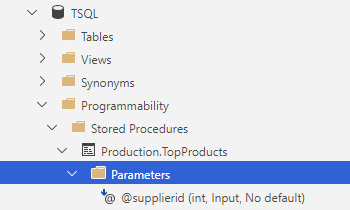

此时将显示存储过程的由两部分组成的名称，以及包含每个参数的“参数”文件夹：

参数名称。
数据类型。
指示输入参数的“in”箭头。
指示输出参数的“out”箭头。
你可以查询系统目录视图（如 sys.parameters）以检索参数定义以及对象 ID。

默认值
如果使用默认值声明了某个参数，则在运行该存储过程时，无需传递值。 如果传递了值，将使用该值，但如果未传递任何值，将使用默认值。

创建存储过程时，将使用 = 运算符为参数提供默认值，例如：

In [ ]:
CREATE PROCEDURE Sales.SalesYTD  
    -- Set NULL as the default value
    @SalesPerson nvarchar(50) = NULL 
    AS ...

输出参数
你已经看到了如何向存储过程传递一个值，即输入参数。

不过，你也可以将值返回给调用程序。 这称为 OUTPUT 参数。 在 CREATE PROCEDURE 语句中使用 OUTPUT 或 OUT 关键字指定一个输出参数。 当过程退出时，它向调用程序返回输出参数的当前值。

执行过程时，调用程序也必须使用 OUTPUT 关键字，才能将该参数值保存到可以在调用程序中使用的变量中。

在下面的 T-SQL 代码片段中，有两个参数被定义为 OUTPUT 参数：@ComparePrice 和 @ListPrice。

In [ ]:
CREATE PROCEDURE Production.uspGetList @Product varchar(40)
    , @MaxPrice money   
    , @ComparePrice money OUTPUT  
    , @ListPrice money OUT  
AS

创建存储过程
存储过程是使用“CREATE PROCEDURE”关键字创建的。 要创建存储过程，需要以下权限：

数据库中的 CREATE PROCEDURE 权限。
对在其中创建过程的架构的 ALTER 权限。
首先编写并测试 SELECT 语句，如果该语句可以正常运行，请在架构和过程名称之前添加 CREATE PROCEDURE 关键字。

例如，以下代码将在 SalesLT 架构中创建一个名为“TopProducts”的存储过程。

In [ ]:
CREATE PROCEDURE SalesLT.TopProducts AS
SELECT TOP(10) name, listprice
    FROM SalesLT.Product
    GROUP BY name, listprice
    ORDER BY listprice DESC;

#### 将动态 SQL 与 EXEC 和 sp-execute-sql 一起使用

使用动态 SQL 可以生成一个字符串，该字符串可以作为 T-SQL 执行以替代存储过程。 在执行时间之前不知道某些值时，动态 SQL 非常有用。

可以通过两种方法创建动态 SQL，分别是使用：

- “EXECUTE”或“EXEC”关键字。
- 系统存储过程 sp_executesql。
使用 EXECUTE 或 EXEC 的动态 SQL
若要使用 EXECUTE 或 EXEC 编写动态 SQL 语句，语法为：

```EXEC (@string_variable);```

在下面的示例中，我们声明了一个 VARCHAR 类型的名为 @sqlstring 的变量，然后为其分配一个字符串。

In [ ]:
DECLARE @sqlstring AS VARCHAR(1000);
    SET @sqlstring='SELECT customerid, companyname, firstname, lastname 
    FROM SalesLT.Customer;'
EXEC(@sqlstring);
GO

In [ ]:
使用 Sp_executesql 的动态 SQL
通过 sp_executesql，你可以使用参数执行 T-SQL 语句。 如果要向语句传递不同的值，可以使用 sp_executesql 代替存储过程。 T-SQL 语句保持不变，只有参数值发生了变化。 与存储过程一样，SQL Server 查询优化器可能会重复使用执行计划。

Sp_executesql 使用 T-SQL 语句作为参数，该参数可以是 Unicode 常数，也可以是 Unicode 变量。 例如，以下两个代码示例都是有效的：

In [ ]:
DECLARE @sqlstring1 NVARCHAR(1000);
SET @SqlString1 =
    N'SELECT TOP(10) name, listprice
    FROM SalesLT.Product
    GROUP BY name, listprice
    ORDER BY listprice DESC;'
EXECUTE sp_executesql @SqlString1;

OR

EXECUTE sp_executesql N'SELECT TOP(10) name, listprice
    FROM SalesLT.Product
    GROUP BY name, listprice
    ORDER BY listprice DESC;

EXECUTE sp_executesql   
        N'SELECT * FROM SalesLT.Customer   
        WHERE CompanyName = @company',  
        N'@company nvarchar(128)',  
        @company = "Sharp Bikes";

创建用户定义的函数

用户定义函数 (UDF) 类似于存储过程，因为它们与数据库中的表分开存储。 这些函数接受参数，执行操作，然后将操作结果作为单个（标量）值或结果集（表值）返回。 然后在编写 SELECT 语句时，就可以用该函数来替代表。 用户定义函数旨在执行计算并在另一个语句中使用该计算结果。 而存储过程可以封装函数和语句，甚至修改数据库中的数据。

我们将查看三种类型的用户定义函数。



内联表值函数
内联表值函数 (TVF) 是基于 SELECT 语句创建的最简单的函数，也是用于提高性能的首选函数。

在下面的示例中，创建了一个具有“unitprice”输入参数的表值函数。

In [ ]:
CREATE FUNCTION SalesLT.ProductsListPrice(@cost money)  
RETURNS TABLE  
AS  
RETURN  
    SELECT ProductID, Name, ListPrice  
    FROM SalesLT.Product  
    WHERE ListPrice > @cost;

SELECT Name, ListPrice  
FROM SalesLT.ProductsListPrice(500);

多语句表值函数
与内联 TVF 不同，多语句表值函数 (MSTVF) 可以有多个语句，并且具有不同的语法要求。
多个语句指可以存在insert 和 update 以及select 
请注意以下代码中的用法，除了 RETURN 之外，我们还使用 BEGIN/END：

In [ ]:
CREATE FUNCTION Sales.mstvf_OrderStatus ()
RETURNS
@Results TABLE
     ( CustomerID int, OrderDate datetime )
AS
BEGIN
     INSERT INTO @Results
     SELECT SC.CustomerID, OrderDate
     FROM Sales.Customer AS SC
     INNER JOIN Sales.SalesOrderHeader AS SOH
        ON SC.CustomerID = SOH.CustomerID
     WHERE Status >= 5
 RETURN;
END;


SELECT *
FROM Sales.mstvf_OrderStatus();

性能注意事项
查询优化器无法估计多语句表值函数将返回多少行，但可以估计内联表值函数。 因此，尽可能使用内联 TVF 以提高性能。 如果不需要将 MSTVF 与其他表联接，并且/或者知道结果只有几行，则性能影响并不用担心。 如果需要大型结果集并且需要与其他表联接，请考虑使用**临时表来存储结果**，然后联接到临时表。

在 SQL Server 2017 及更高版本中，Microsoft 引入了智能查询处理功能，以提高 MSTVF 的性能。

标量用户定义函数
与表值函数不同，标量用户定义函数仅返回一个值，因此通常用于简单、频繁使用的语句。

下面举例说明了如何获取特定产品在特定日期的产品列表价格：

In [ ]:
CREATE FUNCTION dbo.ufn_GetProductListPrice
(@ProductID [int], @OrderDate [datetime])
RETURNS [money] 
AS 
BEGIN
    DECLARE @ListPrice money;
        SELECT @ListPrice = plph.[ListPrice]
        FROM [Production].[Product] p 
        INNER JOIN [Production].[ProductListPriceHistory] plph 
        ON p.[ProductID] = plph.[ProductID] 
            AND p.[ProductID] = @ProductID 
            AND StartDate = @OrderDate
    RETURN @ListPrice;
END;
GO

SELECT dbo.ufn_GetProductListPrice (707, '2021-05-31')

将函数绑定到引用的对象
创建函数时，SCHEMABINDING 是可选的。 指定 SCHEMABINDING 时，它会将函数绑定到引用的对象，那么在不修改函数的情况下也不能修改对象。 在修改对象之前，必须首先修改或放弃该函数以消除依赖关系。

如果发生以下任一情况，将删除 SCHEMABINDING：

- 函数已删除
- 使用 ALTER 语句修改函数，但不指定 SCHEMABINDING 不指定即表示 


### 错误处理
